In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import style
import util
import get_data, sklearn
import datetime as dt
%matplotlib inline
style.use('ggplot')

In [37]:
def plot_feature_importances(model_name, importances, feature_names, num_features=None,
                             fig_size=None, ax=None):
    features_importances = pd.DataFrame(sorted(zip(feature_names, importances),
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['features','importances'])
    data = features_importances[:num_features]
    data.plot('features','importances', kind='barh', ax=ax,
              color='blue', figsize=fig_size, legend = None)
    plt.gca().invert_yaxis() # reverse the order of features
    plt.ylabel('feature importances')
    if num_features:
        plt.title(model_name + '\nTop '+str(num_features))
    else:
        plt.title(model_name + '\nAll Features')

In [38]:
from mpl_finance import volume_overlay3
from matplotlib.dates import num2date
from matplotlib.dates import date2num
import matplotlib.mlab as mlab
import matplotlib.dates as mdates

In [39]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'size'   : 15}

matplotlib.rc('font', **font)

In [67]:
start_date = '2000-01-01'
end_date = '2019-12-31'
dates_partial = pd.date_range(start_date, end_date)

# Choose which stock to look at
stock = '^GSPC'

data_partial = get_data.get_data_csv(stock, dates_partial, redownload=False)
data_partial.dropna(inplace=True)
data_partial = util.remove_data_with_same_open_close(data_partial)

In [68]:
datanew_partial = util.calc_features_seq(data_partial, look_back=10, fee=0)
AdjClose = data_partial['Adj Close']
Volume = data_partial['Volume']
datanew_partial.dropna(inplace=True)
target_partial = datanew_partial['Change']
#adjclose = datanew['Adj Close']
features_partial = datanew_partial.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Change'], axis=1)

In [69]:
type(features_partial.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [70]:
features_partial

,Change10d,Overnight_Change10d,Change9d,Overnight_Change9d,Change8d,Overnight_Change8d,Change7d,Overnight_Change7d,Change6d,Overnight_Change6d,Change5d,Overnight_Change5d,Change4d,Overnight_Change4d,Change3d,Overnight_Change3d,Change2d,Overnight_Change2d,Change1d,Overnight_Change1d
2000-01-18,-0.954910,0.682373,-3.834473,4.696945,0.192223,4.496078,0.095573,4.396317,2.709045,1.642769,1.118996,0.517975,-1.306252,1.848373,-0.438637,2.297089,1.216965,1.067131,1.067131,0.000000
2000-01-19,-3.834473,3.981644,0.192223,3.782158,0.095573,3.683067,2.709045,0.948341,1.118996,-0.168770,-1.306252,1.152534,-0.438637,1.598183,1.216965,0.376633,1.067131,-0.683205,-0.683205,0.000000
2000-01-20,0.192223,3.836365,0.095573,3.737221,2.709045,1.001060,1.118996,-0.116631,-1.306252,1.205368,-0.438637,1.651245,1.216965,0.429054,1.067131,-0.631340,-0.683205,0.052231,0.052231,0.000000
2000-01-21,0.095573,3.001183,2.709045,0.284431,1.118996,-0.825325,-1.306252,0.487289,-0.438637,0.930008,1.216965,-0.283516,1.067131,-1.336380,-0.683205,-0.657669,0.052231,-0.709526,-0.709526,0.000000
2000-01-24,2.709045,-0.007629,1.118996,-1.114159,-1.306252,0.194633,-0.438637,0.636063,1.216965,-0.573921,1.067131,-1.623726,-0.683205,-0.946991,0.052231,-0.998695,-0.709526,-0.291229,-0.291229,0.000000
2000-01-25,1.118996,-3.846733,-1.306252,-2.574104,-0.438637,-2.144875,1.216965,-3.321426,1.067131,-4.342216,-0.683205,-3.684181,0.052231,-3.734459,-0.709526,-3.046547,-0.291229,-2.763359,-2.763359,0.000000
2000-01-26,-1.306252,-1.983238,-0.438637,-1.551407,1.216965,-2.735092,1.067131,-3.762077,-0.683205,-3.100044,0.052231,-3.150627,-0.709526,-2.458542,-0.291229,-2.173637,-2.763359,0.606476,0.606476,0.000000
2000-01-27,-0.438637,-1.966141,1.216965,-3.144836,1.067131,-4.167496,-0.683205,-3.508255,0.052231,-3.558624,-0.709526,-2.869453,-0.291229,-2.585754,-2.763359,0.182655,0.606476,-0.421272,-0.421272,0.000000
2000-01-28,1.216965,-3.526299,1.067131,-4.544930,-0.683205,-3.888290,0.052231,-3.938461,-0.709526,-3.251999,-0.291229,-2.969414,-2.763359,-0.211914,0.606476,-0.813461,-0.421272,-0.393845,-0.393845,-0.000008
2000-01-31,1.067131,-7.165817,-0.683205,-6.527206,0.052231,-6.576004,-0.709526,-5.908394,-0.291229,-5.633568,-2.763359,-2.951775,0.606476,-3.536804,-0.421272,-3.128716,-0.393845,-2.745682,-2.745682,0.000000


In [71]:
#Train-test data splits for roll-forward cross validation
from sklearn import preprocessing
features_scaled = pd.DataFrame(preprocessing.scale(features_partial))
from sklearn.model_selection import train_test_split
from LSTM_layers import LSTM_keras
X_train, X_test, y_train, y_test = train_test_split(features_scaled.values, target_partial, shuffle = False, test_size=0.2)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm = LSTM_keras(input_shape = (X_train.shape[1], 1), nodes = [20, 20], l2 = 0.01)
history = lstm.train(X_train, y_train, val_portion = 0.2, n_epochs = 50, n_batch = 128)

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype float32 were all converted to float64 by the scale function.
  app.launch_new_instance()


Train on 2784 samples, validate on 696 samples
Epoch 1/50
2784/2784 [==============================] - 3s 1ms/step - loss: 0.9888 - acc: 0.4835 - val_loss: 0.9454 - val_acc: 0.5144
Epoch 2/50
2784/2784 [==============================] - 1s 221us/step - loss: 0.9137 - acc: 0.5323 - val_loss: 0.8793 - val_acc: 0.5560
Epoch 3/50
2784/2784 [==============================] - 1s 218us/step - loss: 0.8573 - acc: 0.5280 - val_loss: 0.8297 - val_acc: 0.5560
Epoch 4/50
2784/2784 [==============================] - 1s 219us/step - loss: 0.8145 - acc: 0.5273 - val_loss: 0.7925 - val_acc: 0.5560
Epoch 5/50
2784/2784 [==============================] - 1s 220us/step - loss: 0.7820 - acc: 0.5269 - val_loss: 0.7645 - val_acc: 0.5560
Epoch 6/50
2784/2784 [==============================] - 1s 217us/step - loss: 0.7575 - acc: 0.5269 - val_loss: 0.7436 - val_acc: 0.5560
Epoch 7/50
2784/2784 [==============================] - 1s 218us/step - loss: 0.7392 - acc: 0.5269 - val_loss: 0.7280 - val_acc: 0.5560
Epo

In [72]:
#model = lstm.clf
#filename = 'saved_model.sav'
#import pickle
#pickle.dump(model, open(filename,'wb'))

In [73]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [74]:
#model_trained = pickle.load(open(filename,'rb'))
#lstm.clf = model_trained
pred = lstm.predict(X_test)

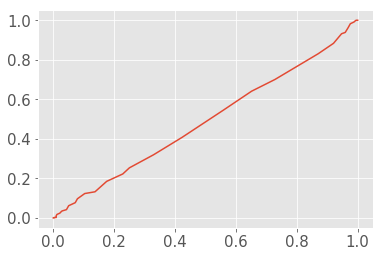

0.48751482548288716

In [75]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
plt.plot(fpr, tpr)
plt.show()
metrics.auc(fpr, tpr)

In [76]:
# credit: Hye Joo Han
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root_mean_squared_error ($)')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label='Validation Loss')
    plt.legend()

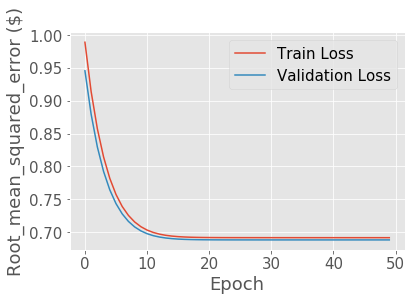

In [77]:
plot_history(history)

In [78]:
test_data = data_partial.iloc[int(X_train.shape[0]*0.8) + 1:int(X_train.shape[0])+1]

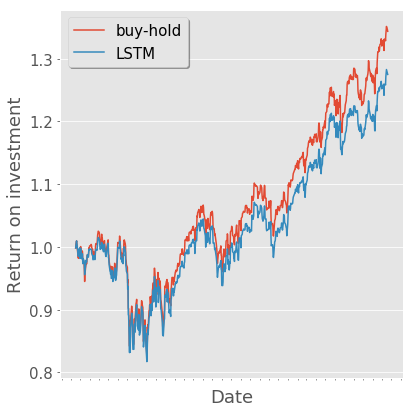

1.2750476172649987

In [79]:
util.gain_plot_from_test_data(test_data, pred, fee=10, model_name = "LSTM")

In [80]:
pred

array([[0.52818036],
       [0.5281804 ],
       [0.52818054],
       [0.5281803 ],
       [0.52818024],
       [0.52818036],
       [0.5281804 ],
       [0.52818036],
       [0.5281804 ],
       [0.5281806 ],
       [0.5281807 ],
       [0.52818066],
       [0.52818066],
       [0.5281804 ],
       [0.5281804 ],
       [0.5281805 ],
       [0.52818084],
       [0.52818084],
       [0.5281808 ],
       [0.5281806 ],
       [0.5281806 ],
       [0.52818024],
       [0.52818024],
       [0.52818006],
       [0.5281801 ],
       [0.5281801 ],
       [0.5281801 ],
       [0.52818024],
       [0.5281803 ],
       [0.52818036],
       [0.52818054],
       [0.5281806 ],
       [0.5281806 ],
       [0.5281805 ],
       [0.5281805 ],
       [0.5281805 ],
       [0.5281805 ],
       [0.5281808 ],
       [0.5281805 ],
       [0.52818036],
       [0.5281805 ],
       [0.5281805 ],
       [0.5281805 ],
       [0.52818054],
       [0.5281808 ],
       [0.5281812 ],
       [0.5281812 ],
       [0.528